## Trabalho do Grau A - Ciência de Dados e Big Data.

## 1. Definições Iniciais

- Integrantes: João Accorsi e Rafael Klauck.
- Dataset: Alzheimer's Disease Dataset.
- Professor: Felipe de Morais.
- Grupo: 3.

## 2. Modelagem

# 2.1 Dataset Escolhido 

O presente trabalho consta com a implementação de um modelo de Machine Learning, a partir do Dataset 'Alzheimer's Disease Dataset'. A base de dados possui informações de 2149 pacientes, com características que podem influenciar no diagnóstico do Alzheimer, como fatores cotidianos (fumante, IMC, frequência com que prática de atividade física etc), histórico médico (familiares com Alzheimer, diabetes etc), medidas clínicas (nível colesterol/triglicerídeos etc), aptidão cognitiva (teste de memória, exame mental etc), sintomas (confusão, desorientação, nível de esquecimento etc); e por fim, o diagnóstico de possuir ou não Alzheimer. Desta forma, o objetivo da construção do algoritmo de Machine Learning é identificar quais características são mais relevantes, e levam ao paciente a desenvolver Alzheimer, treinando assim um modelo, o qual será capaz de classificar um novo paciente com tendência ou não a desenvolver Alzheimer.

A base de dados pode ser encontrado no Kaggle https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

## 3. Implementação

# 3.1 Importações

Inicialmente, a importação de bibliotecas necessárias é feita.

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import numpy as np

Em seguida, o download do dataset direto do Kaggle, e a sua visualização.

In [2]:
alzheimers_data = pd.read_csv('alzheimers_disease_data.csv')
alzheimers_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# 3.2 Pré Processamento dos Dados

Para o pré-processamento dos dados, inicialmente foi verificado se alguma entrada do dataset possuía valor nulo.
Como resultado, nenhum valor nulo foi encontrado.

In [27]:
alzheimers_data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Continuando no pré-processamento dos dados, na página do Kaggle, é fornecido os ranges de cada parâmetro do dataset. Por exemplo, o gênero é 0 (Masculino) e 1 (Feminino), e a idade varia de 60 a 90. Desta forma, for realizada uma checagem de forma a visualizar caso alguma das features possuía um parâmetro fora do range esperado.

In [28]:
# Gender
print(alzheimers_data[alzheimers_data['Gender'] > 1])
print(alzheimers_data[alzheimers_data['Gender'] < 0])

# Age
print(alzheimers_data[alzheimers_data['Age'] > 90])
print(alzheimers_data[alzheimers_data['Age'] < 60])

# Ethnicity
print(alzheimers_data[alzheimers_data['Ethnicity'] < 0])
print(alzheimers_data[alzheimers_data['Ethnicity'] > 3])

# EducationLevel
print(alzheimers_data[alzheimers_data['EducationLevel'] < 0])
print(alzheimers_data[alzheimers_data['EducationLevel'] > 3])

# BMI
print(alzheimers_data[alzheimers_data['BMI'] < 15])
print(alzheimers_data[alzheimers_data['BMI'] > 40])

# Smoking
print(alzheimers_data[alzheimers_data['Smoking'] < 0])
print(alzheimers_data[alzheimers_data['Smoking'] > 1])

# AlcoholConsumption
print(alzheimers_data[alzheimers_data['AlcoholConsumption'] < 0])
print(alzheimers_data[alzheimers_data['AlcoholConsumption'] > 20])

# PhysicalActivity
print(alzheimers_data[alzheimers_data['PhysicalActivity'] < 0])
print(alzheimers_data[alzheimers_data['PhysicalActivity'] > 10])

# DietQuality
print(alzheimers_data[alzheimers_data['DietQuality'] < 0])
print(alzheimers_data[alzheimers_data['DietQuality'] > 10])

# SleepQuality
print(alzheimers_data[alzheimers_data['SleepQuality'] < 4])
print(alzheimers_data[alzheimers_data['SleepQuality'] > 10])

# FamilyHistoryAlzheimers
print(alzheimers_data[alzheimers_data['FamilyHistoryAlzheimers'] < 0])
print(alzheimers_data[alzheimers_data['FamilyHistoryAlzheimers'] > 1])

# CardiovascularDisease
print(alzheimers_data[alzheimers_data['CardiovascularDisease'] < 0])
print(alzheimers_data[alzheimers_data['CardiovascularDisease'] > 1])

# Diabetes
print(alzheimers_data[alzheimers_data['Diabetes'] < 0])
print(alzheimers_data[alzheimers_data['Diabetes'] > 1])

# Depression
print(alzheimers_data[alzheimers_data['Depression'] < 0])
print(alzheimers_data[alzheimers_data['Depression'] > 1])

# HeadInjury
print(alzheimers_data[alzheimers_data['HeadInjury'] < 0])
print(alzheimers_data[alzheimers_data['HeadInjury'] > 1])

# Hypertension
print(alzheimers_data[alzheimers_data['Hypertension'] < 0])
print(alzheimers_data[alzheimers_data['Hypertension'] > 1])

# SystolicBP
print(alzheimers_data[alzheimers_data['SystolicBP'] < 90])
print(alzheimers_data[alzheimers_data['SystolicBP'] > 180])

# DiastolicBP
print(alzheimers_data[alzheimers_data['DiastolicBP'] < 60])
print(alzheimers_data[alzheimers_data['DiastolicBP'] > 120])

# CholesterolTotal
print(alzheimers_data[alzheimers_data['CholesterolTotal'] < 150])
print(alzheimers_data[alzheimers_data['CholesterolTotal'] > 300])

# CholesterolLDL
print(alzheimers_data[alzheimers_data['CholesterolLDL'] < 50])
print(alzheimers_data[alzheimers_data['CholesterolLDL'] > 200])

# CholesterolHDL
print(alzheimers_data[alzheimers_data['CholesterolHDL'] < 20])
print(alzheimers_data[alzheimers_data['CholesterolHDL'] > 100])

# CholesterolTriglycerides
print(alzheimers_data[alzheimers_data['CholesterolTriglycerides'] < 50])
print(alzheimers_data[alzheimers_data['CholesterolTriglycerides'] > 400])

# MMSE
print(alzheimers_data[alzheimers_data['MMSE'] < 0])
print(alzheimers_data[alzheimers_data['MMSE'] > 30])

# FunctionalAssessment 
print(alzheimers_data[alzheimers_data['FunctionalAssessment'] < 0])
print(alzheimers_data[alzheimers_data['FunctionalAssessment'] > 10])

# MemoryComplaints
print(alzheimers_data[alzheimers_data['MemoryComplaints'] < 0])
print(alzheimers_data[alzheimers_data['MemoryComplaints'] > 1])

# BehavioralProblems
print(alzheimers_data[alzheimers_data['BehavioralProblems'] < 0])
print(alzheimers_data[alzheimers_data['BehavioralProblems'] > 1])

# ADL
print(alzheimers_data[alzheimers_data['ADL'] < 0])
print(alzheimers_data[alzheimers_data['ADL'] > 10])

# Confusion
print(alzheimers_data[alzheimers_data['Confusion'] < 0])
print(alzheimers_data[alzheimers_data['Confusion'] > 1])

# Disorientation
print(alzheimers_data[alzheimers_data['Disorientation'] < 0])
print(alzheimers_data[alzheimers_data['Disorientation'] > 1])

# PersonalityChanges
print(alzheimers_data[alzheimers_data['PersonalityChanges'] < 0])
print(alzheimers_data[alzheimers_data['PersonalityChanges'] > 1])

# DifficultyCompletingTasks
print(alzheimers_data[alzheimers_data['DifficultyCompletingTasks'] < 0])
print(alzheimers_data[alzheimers_data['DifficultyCompletingTasks'] > 1])

# Forgetfulness
print(alzheimers_data[alzheimers_data['Forgetfulness'] < 0])
print(alzheimers_data[alzheimers_data['Forgetfulness'] > 1])

# Diagnosis
print(alzheimers_data[alzheimers_data['Diagnosis'] < 0])
print(alzheimers_data[alzheimers_data['Diagnosis'] > 1])


Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis, DoctorInCharge]
Index: []
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation,

Com o resultados dos checks acima, é possível vereficar que não há dados inconsistentes. Os valores que são esperados (que estão na documentação no Kaggle) estão presentes e não há valores faltantes.

Um ponto importante que notamos da documentação do dataset foram os parâmetros abaixo:
- MMSE, FunctionalAssessment e ADL: quanto maior o valor, melhor - "Lower scores indicate greater impairment".

# 3.3 Análise dos Dados

Assim, de forma a visualizar melhor os dados, para obter uma informações de quais parâmetros tem mais tendência a influenciar o Alzheimer, o método describe, foi utilizado. Com isso, cada parâmetro é exibido com:
- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

* Percentile meaning: how many of the values are less than the given percentile.  

Referência: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [29]:
alzheimers_data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nenhuma anomalia adicional foi encontrada no dataset.

Como primeira análise, foi plotado o gráfico de diagnósticos do Alzheimer em relação a idade.

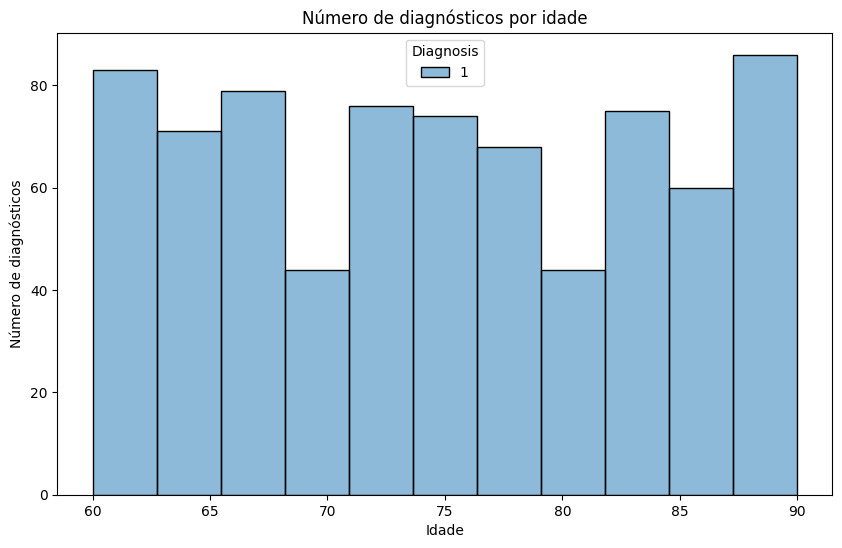

In [30]:
filtered_alzheimers_data = alzheimers_data[alzheimers_data['Diagnosis'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_alzheimers_data, x='Age', hue='Diagnosis')
plt.title('Número de diagnósticos por idade')
plt.xlabel('Idade')
plt.ylabel('Número de diagnósticos')
plt.show()

Observa-se que a distribuição de positivos ao Alzheimer em relação com a idade não apresenta demais anomalias, e sim uma distribuição normal.

Seguindo na análise, a distribuição dos diagnósticos positivos e negativos foi exibida, de forma a tentar achar algum padrão.

Para isso, é realizado médias dos valores de cada feature, para os casos positivos e negativos de Alzheimer. Com isso, é possível verificar quais features possuem maior diferença entre os casos positivos e negativos. 

Os gráficos estão agrupados por suas sessões que estão presentes na documentação do dataset:
- Detalhes Demográficos
- Fatores de estilo de vida
- Histórico médico
- Medidas Clínicas
- Medidas cognitivas
- Sintomas

In [32]:
positive_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 1]
negative_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 0]

def get_column_values_means(column_name):
  positive_diagnosis_mean = positive_diagnosis[column_name].mean()
  negative_diagnosis_mean = negative_diagnosis[column_name].mean()
  return positive_diagnosis_mean, negative_diagnosis_mean

def generate_chart(mean1, mean2, title, ylabel):
  sns.barplot(x=['Positive', 'Negative'], y=[mean1, mean2])
  plt.title(title)
  plt.xlabel('Diagnóstico')
  plt.ylabel(ylabel)

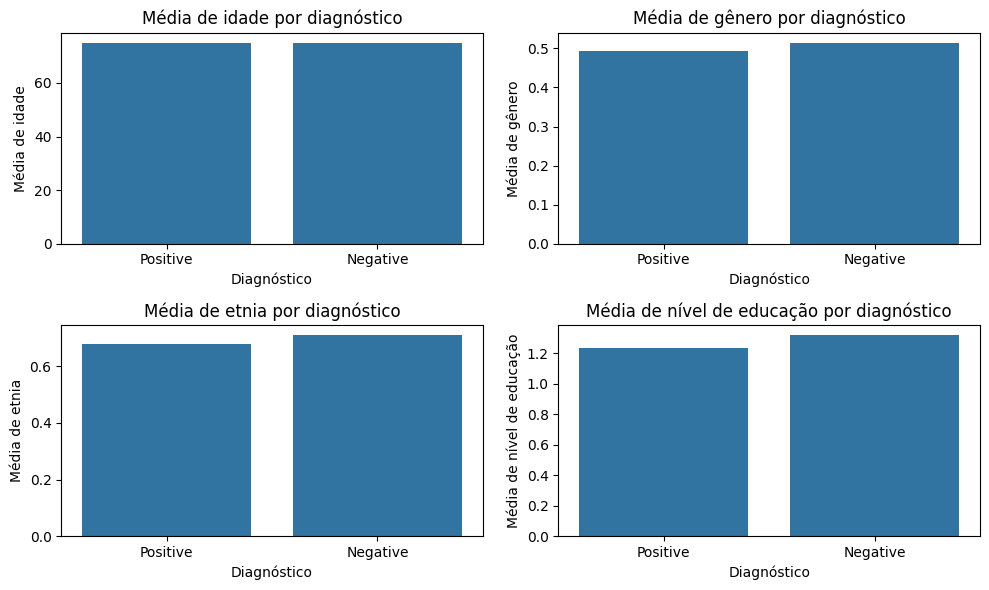

In [33]:
# Grafico das médias dos itens Demographic Details(Genero, Idade, Etnia, Nível de Educação) x Diagnóstico
p_age_mean, n_age_mean = get_column_values_means('Age')
p_gender_mean, n_gender_mean = get_column_values_means('Gender')
p_ethnicity_mean, n_ethnicity_mean = get_column_values_means('Ethnicity')
p_education_level_mean, n_education_level_mean = get_column_values_means('EducationLevel')

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
generate_chart(p_age_mean, n_age_mean, 'Média de idade por diagnóstico', 'Média de idade')

plt.subplot(2, 2, 2)
generate_chart(p_gender_mean, n_gender_mean, 'Média de gênero por diagnóstico', 'Média de gênero')

plt.subplot(2, 2, 3)
generate_chart(p_ethnicity_mean, n_ethnicity_mean, 'Média de etnia por diagnóstico', 'Média de etnia')

plt.subplot(2, 2, 4)
generate_chart(p_education_level_mean, n_education_level_mean, 'Média de nível de educação por diagnóstico', 'Média de nível de educação')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

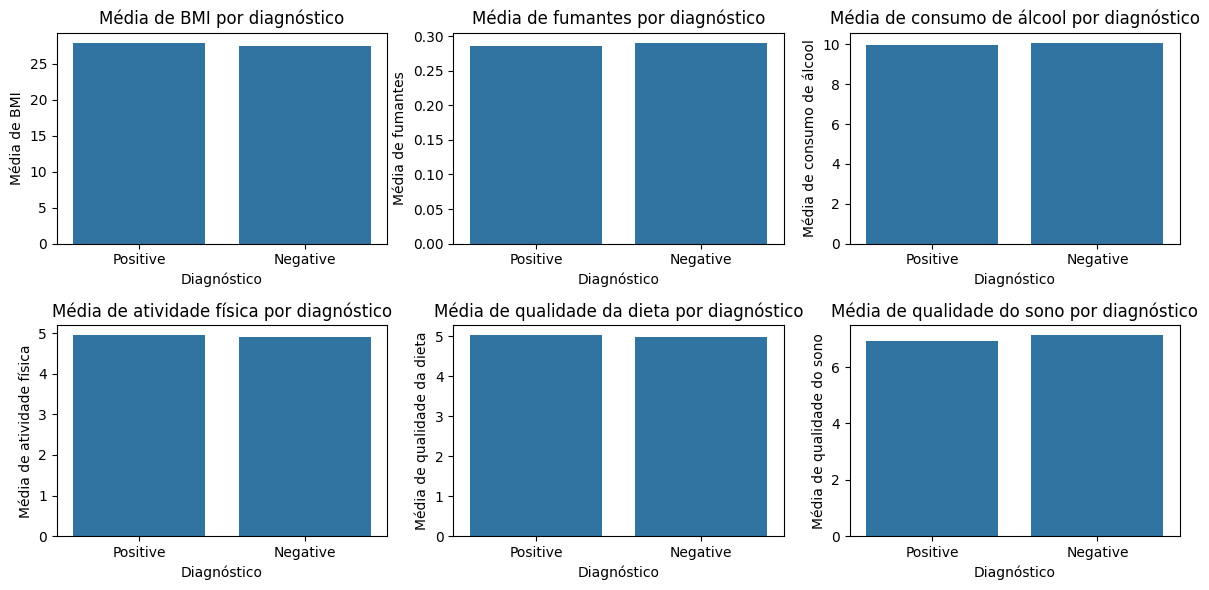

In [91]:
# Grafico Lifestyle Factors (BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality) por diagnóstico
p_bmi_mean, n_bmi_mean = get_column_values_means('BMI')
p_smoking_mean, n_smoking_mean = get_column_values_means('Smoking')
p_alcohol_consumption_mean, n_alcohol_consumption_mean = get_column_values_means('AlcoholConsumption')
p_physical_activity_mean, n_physical_activity_mean = get_column_values_means('PhysicalActivity')
p_diet_quality_mean, n_diet_quality_mean = get_column_values_means('DietQuality')
p_sleep_quality_mean, n_sleep_quality_mean = get_column_values_means('SleepQuality')

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
generate_chart(p_bmi_mean, n_bmi_mean, 'Média de BMI por diagnóstico', 'Média de BMI')

plt.subplot(2, 3, 2)
generate_chart(p_smoking_mean, n_smoking_mean, 'Média de fumantes por diagnóstico', 'Média de fumantes')

plt.subplot(2, 3, 3)
generate_chart(p_alcohol_consumption_mean, n_alcohol_consumption_mean, 'Média de consumo de álcool por diagnóstico', 'Média de consumo de álcool')

plt.subplot(2, 3, 4)
generate_chart(p_physical_activity_mean, n_physical_activity_mean, 'Média de atividade física por diagnóstico', 'Média de atividade física')

plt.subplot(2, 3, 5)
generate_chart(p_diet_quality_mean, n_diet_quality_mean, 'Média de qualidade da dieta por diagnóstico', 'Média de qualidade da dieta')

plt.subplot(2, 3, 6)
generate_chart(p_sleep_quality_mean, n_sleep_quality_mean, 'Média de qualidade do sono por diagnóstico', 'Média de qualidade do sono')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

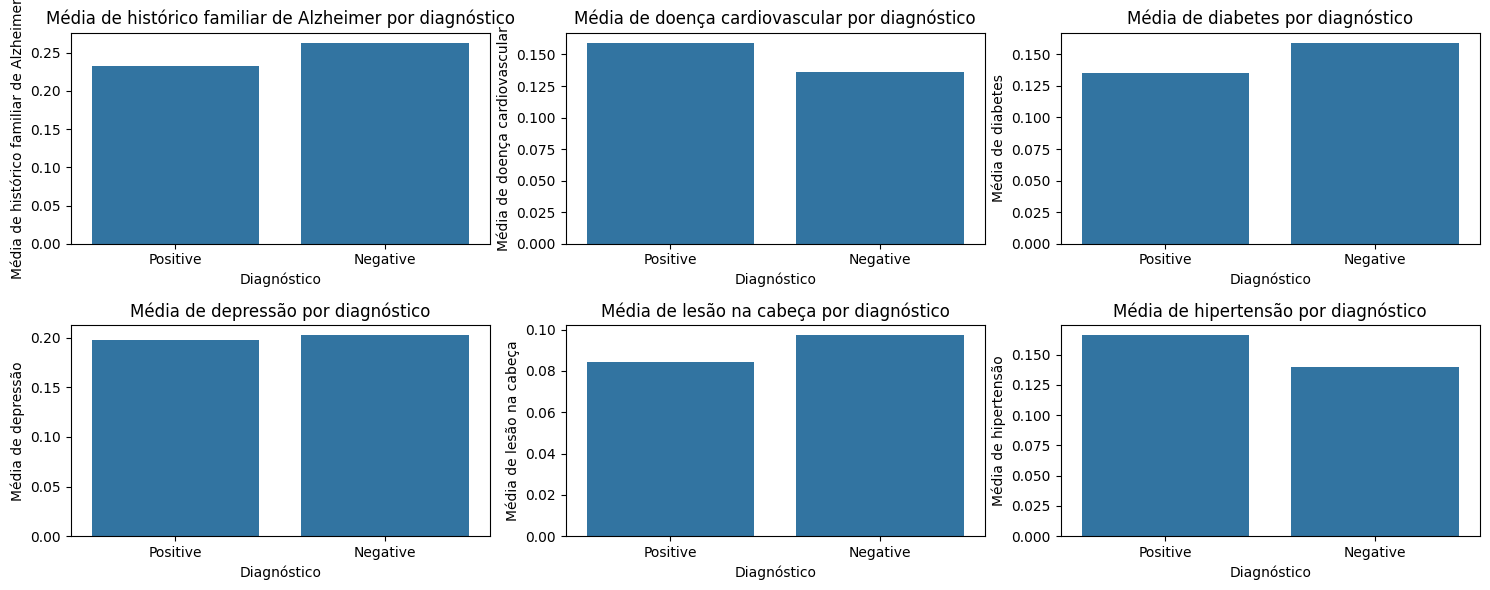

In [34]:
# Grafico informações de histórico médico (FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension) por diagnóstico
p_family_history_alzheimers_mean, n_family_history_alzheimers_mean = get_column_values_means('FamilyHistoryAlzheimers')
p_cardiovascular_disease_mean, n_cardiovascular_disease_mean = get_column_values_means('CardiovascularDisease')
p_diabetes_mean, n_diabetes_mean = get_column_values_means('Diabetes')
p_depression_mean, n_depression_mean = get_column_values_means('Depression')
p_head_injury_mean, n_head_injury_mean = get_column_values_means('HeadInjury')
p_hypertension_mean, n_hypertension_mean = get_column_values_means('Hypertension')

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
generate_chart(p_family_history_alzheimers_mean, n_family_history_alzheimers_mean, 'Média de histórico familiar de Alzheimer por diagnóstico', 'Média de histórico familiar de Alzheimer')

plt.subplot(2, 3, 2)
generate_chart(p_cardiovascular_disease_mean, n_cardiovascular_disease_mean, 'Média de doença cardiovascular por diagnóstico', 'Média de doença cardiovascular')

plt.subplot(2, 3, 3)
generate_chart(p_diabetes_mean, n_diabetes_mean, 'Média de diabetes por diagnóstico', 'Média de diabetes')

plt.subplot(2, 3, 4)
generate_chart(p_depression_mean, n_depression_mean, 'Média de depressão por diagnóstico', 'Média de depressão')

plt.subplot(2, 3, 5)
generate_chart(p_head_injury_mean, n_head_injury_mean, 'Média de lesão na cabeça por diagnóstico', 'Média de lesão na cabeça')

plt.subplot(2, 3, 6)
generate_chart(p_hypertension_mean, n_hypertension_mean, 'Média de hipertensão por diagnóstico', 'Média de hipertensão')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

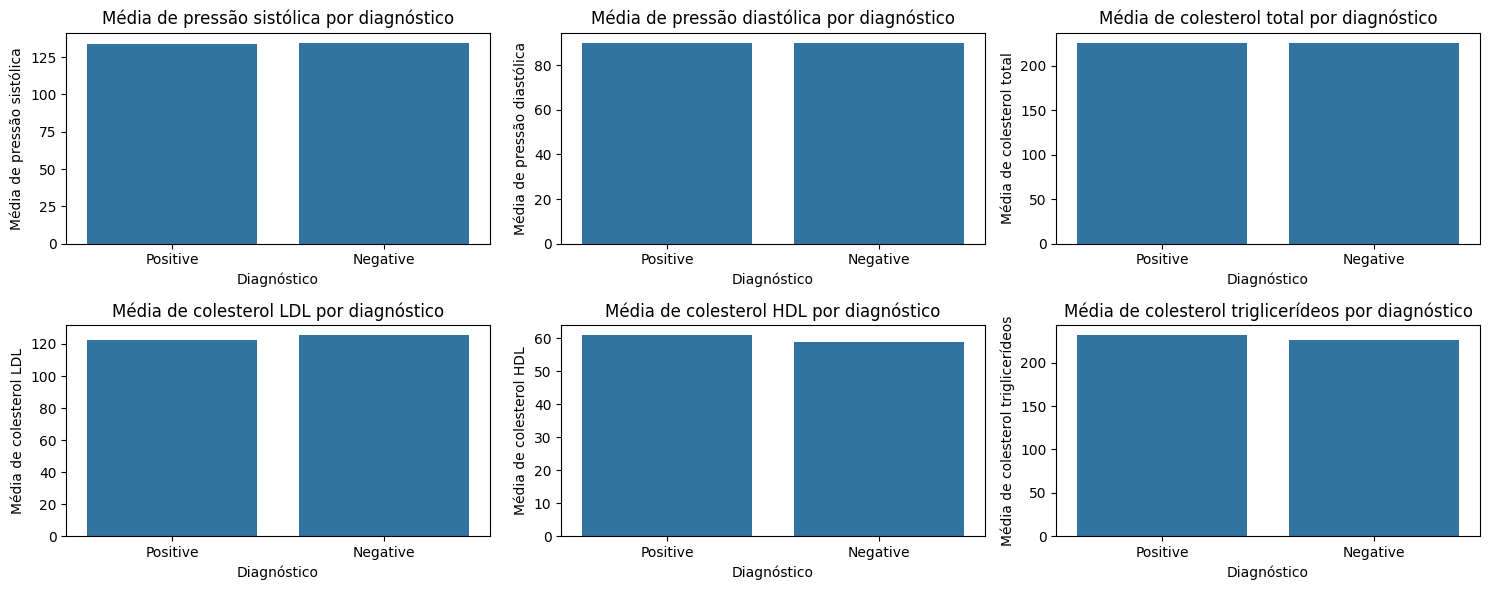

In [35]:
# Grafico informações de histórico clínico (SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides) por diagnóstico
p_systolic_bp_mean, n_systolic_bp_mean = get_column_values_means('SystolicBP')
p_diastolic_bp_mean, n_diastolic_bp_mean = get_column_values_means('DiastolicBP')
p_cholesterol_total_mean, n_cholesterol_total_mean = get_column_values_means('CholesterolTotal')
p_cholesterol_ldl_mean, n_cholesterol_ldl_mean = get_column_values_means('CholesterolLDL')
p_cholesterol_hdl_mean, n_cholesterol_hdl_mean = get_column_values_means('CholesterolHDL')
p_cholesterol_triglycerides_mean, n_cholesterol_triglycerides_mean = get_column_values_means('CholesterolTriglycerides')

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
generate_chart(p_systolic_bp_mean, n_systolic_bp_mean, 'Média de pressão sistólica por diagnóstico', 'Média de pressão sistólica')

plt.subplot(2, 3, 2)
generate_chart(p_diastolic_bp_mean, n_diastolic_bp_mean, 'Média de pressão diastólica por diagnóstico', 'Média de pressão diastólica')

plt.subplot(2, 3, 3)
generate_chart(p_cholesterol_total_mean, n_cholesterol_total_mean, 'Média de colesterol total por diagnóstico', 'Média de colesterol total')

plt.subplot(2, 3, 4)
generate_chart(p_cholesterol_ldl_mean, n_cholesterol_ldl_mean, 'Média de colesterol LDL por diagnóstico', 'Média de colesterol LDL')

plt.subplot(2, 3, 5)
generate_chart(p_cholesterol_hdl_mean, n_cholesterol_hdl_mean, 'Média de colesterol HDL por diagnóstico', 'Média de colesterol HDL')

plt.subplot(2, 3, 6)
generate_chart(p_cholesterol_triglycerides_mean, n_cholesterol_triglycerides_mean, 'Média de colesterol triglicerídeos por diagnóstico', 'Média de colesterol triglicerídeos')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

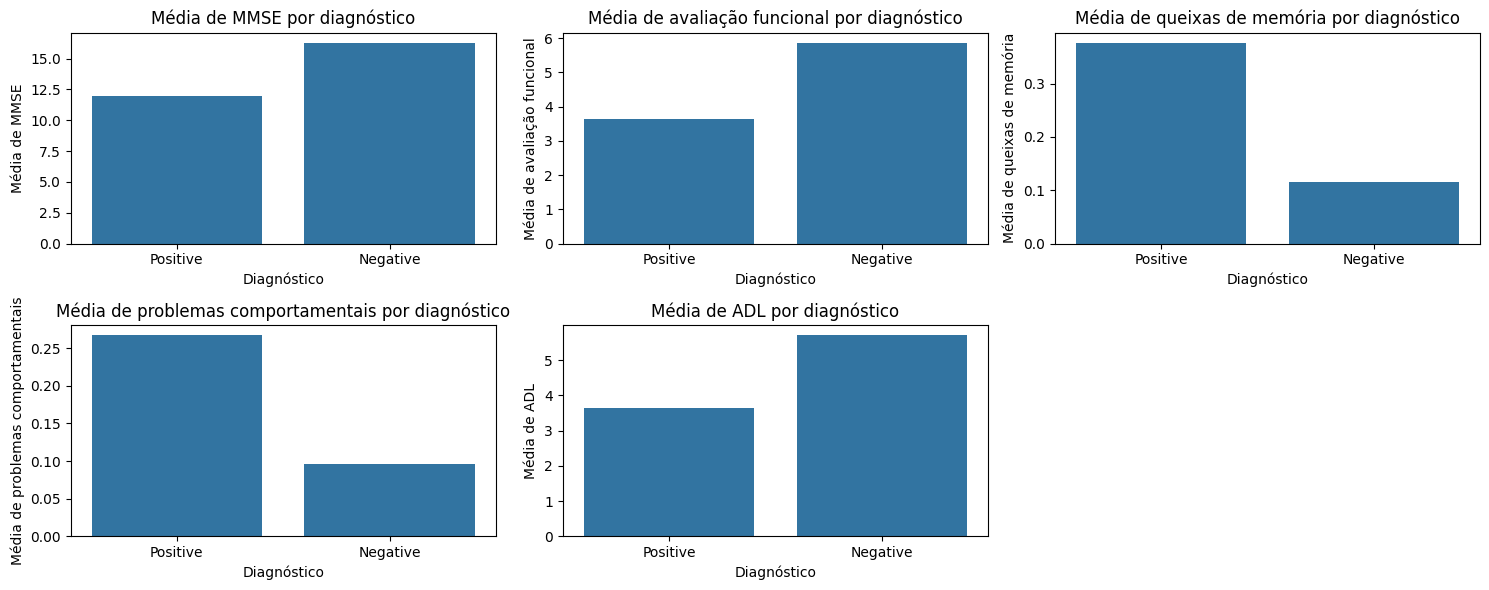

In [36]:
# Grafico informações de avaliação cognitiva (MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL) por diagnóstico
p_mmse_mean, n_mmse_mean = get_column_values_means('MMSE')
p_functional_assessment_mean, n_functional_assessment_mean = get_column_values_means('FunctionalAssessment')
p_memory_complaints_mean, n_memory_complaints_mean = get_column_values_means('MemoryComplaints')
p_behavioral_problems_mean, n_behavioral_problems_mean = get_column_values_means('BehavioralProblems')
p_adl_mean, n_adl_mean = get_column_values_means('ADL')

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
generate_chart(p_mmse_mean, n_mmse_mean, 'Média de MMSE por diagnóstico', 'Média de MMSE')

plt.subplot(2, 3, 2)
generate_chart(p_functional_assessment_mean, n_functional_assessment_mean, 'Média de avaliação funcional por diagnóstico', 'Média de avaliação funcional')

plt.subplot(2, 3, 3)
generate_chart(p_memory_complaints_mean, n_memory_complaints_mean, 'Média de queixas de memória por diagnóstico', 'Média de queixas de memória')

plt.subplot(2, 3, 4)
generate_chart(p_behavioral_problems_mean, n_behavioral_problems_mean, 'Média de problemas comportamentais por diagnóstico', 'Média de problemas comportamentais')

plt.subplot(2, 3, 5)
generate_chart(p_adl_mean, n_adl_mean, 'Média de ADL por diagnóstico', 'Média de ADL')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

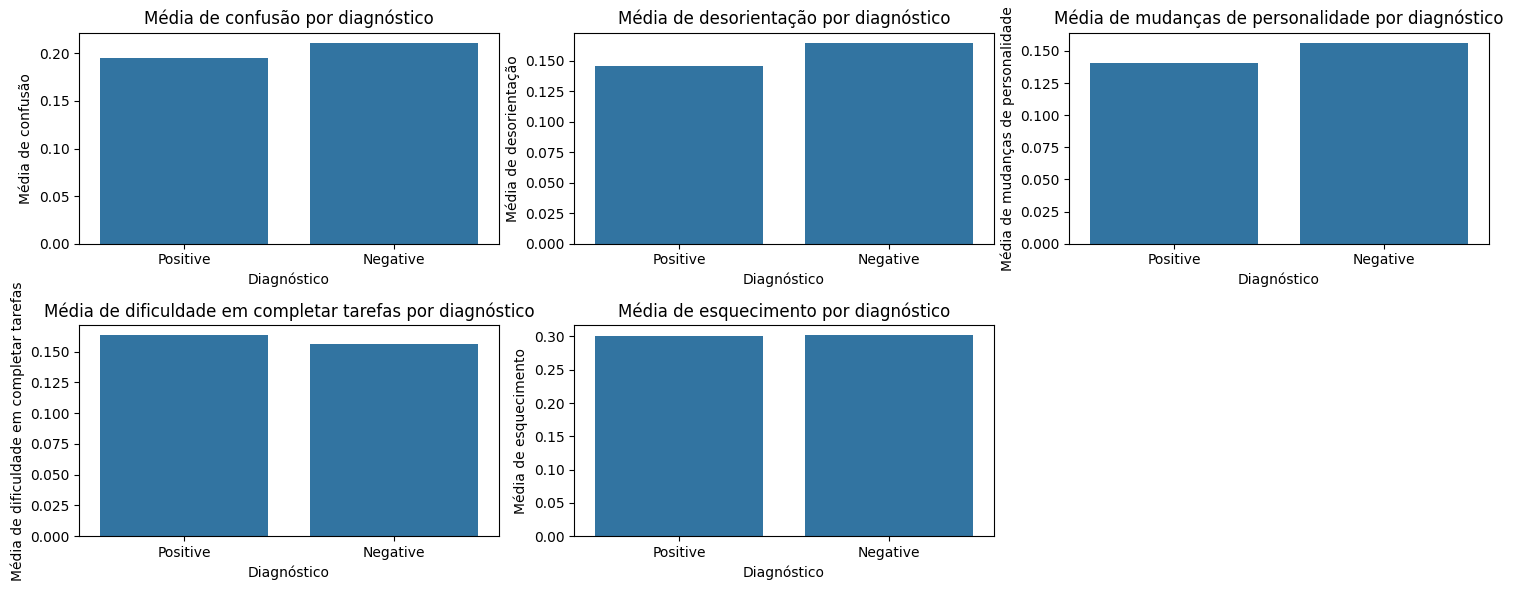

In [37]:
# Grafico informações de avaliação cognitiva (Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness) por diagnóstico
p_confusion_mean, n_confusion_mean = get_column_values_means('Confusion')
p_disorientation_mean, n_disorientation_mean = get_column_values_means('Disorientation')
p_personality_changes_mean, n_personality_changes_mean = get_column_values_means('PersonalityChanges')
p_difficulty_completing_tasks_mean, n_difficulty_completing_tasks_mean = get_column_values_means('DifficultyCompletingTasks')
p_forgetfulness_mean, n_forgetfulness_mean = get_column_values_means('Forgetfulness')

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
generate_chart(p_confusion_mean, n_confusion_mean, 'Média de confusão por diagnóstico', 'Média de confusão')

plt.subplot(2, 3, 2)
generate_chart(p_disorientation_mean, n_disorientation_mean, 'Média de desorientação por diagnóstico', 'Média de desorientação')

plt.subplot(2, 3, 3)
generate_chart(p_personality_changes_mean, n_personality_changes_mean, 'Média de mudanças de personalidade por diagnóstico', 'Média de mudanças de personalidade')

plt.subplot(2, 3, 4)
generate_chart(p_difficulty_completing_tasks_mean, n_difficulty_completing_tasks_mean, 'Média de dificuldade em completar tarefas por diagnóstico', 'Média de dificuldade em completar tarefas')

plt.subplot(2, 3, 5)
generate_chart(p_forgetfulness_mean, n_forgetfulness_mean, 'Média de esquecimento por diagnóstico', 'Média de esquecimento')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

**Descrição Dados com Diagnósticos Positivo**

In [38]:
pd.set_option('display.max_columns', None) # necessário para visualizar todas as colunas
positive_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 1]
positive_diagnosis.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.0
mean,5859.401316,74.842105,0.492105,0.677632,1.232895,27.912670,0.285526,9.980156,4.943160,5.026581,6.916292,0.232895,0.159211,0.135526,0.197368,0.084211,0.165789,133.717105,89.973684,225.565197,122.461726,60.795330,231.406671,11.994657,3.653380,0.376316,0.267105,3.657938,0.194737,0.146053,0.140789,0.163158,0.301316,1.0
std,632.399817,9.149977,0.500267,0.984745,0.902184,7.298765,0.451962,5.769338,2.836046,2.911135,1.755597,0.422954,0.366113,0.342510,0.398275,0.277886,0.372136,25.962885,17.458231,43.192207,43.231730,23.236805,102.115973,7.225532,2.566685,0.484780,0.442739,2.700909,0.396259,0.353392,0.348033,0.369753,0.459132,0.0
min,4758.000000,60.000000,0.000000,0.000000,0.000000,15.018240,0.000000,0.065286,0.019957,0.019940,4.006171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.212650,50.430083,20.015125,50.461611,0.050624,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5326.750000,67.000000,0.000000,0.000000,1.000000,21.684882,0.000000,4.802623,2.632883,2.596171,5.340061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,188.747243,85.195865,39.687037,140.034382,6.040483,1.576868,0.000000,0.000000,1.425180,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5858.500000,75.000000,0.000000,0.000000,1.000000,28.004793,0.000000,9.860342,4.845318,5.082541,6.912164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,226.448082,121.803389,61.847228,239.618889,11.565835,3.299060,0.000000,0.000000,3.235750,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,6405.500000,83.000000,1.000000,1.000000,2.000000,34.449386,1.000000,15.190361,7.374699,7.577309,8.411609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.000000,105.000000,262.805195,160.046948,80.565846,316.131860,18.151993,4.920710,1.000000,1.000000,5.026479,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,6898.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.988291,9.985069,9.971204,9.997627,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.959991,199.965665,99.959494,399.854322,29.959425,9.927945,1.000000,1.000000,9.945036,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


**Descrição Dados com Diagnósticos Negativo**

In [39]:
pd.set_option('display.max_columns', None) # necessário para visualizar todas as colunas
negative_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 0]
negative_diagnosis.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.0
mean,5806.177106,74.945284,0.514039,0.708423,1.316055,27.515092,0.290137,10.071880,4.907640,4.974839,7.124832,0.262779,0.136069,0.159107,0.202304,0.097192,0.139669,134.564435,89.778978,224.996342,125.361434,58.734832,226.571537,16.265543,5.860669,0.115911,0.096472,5.707951,0.210943,0.164867,0.156228,0.156228,0.301656,0.0
std,613.315616,8.904709,0.499983,1.002487,0.904779,7.171293,0.453989,5.753469,2.869635,2.908802,1.764196,0.440302,0.342985,0.365908,0.401862,0.296326,0.346768,25.946402,17.671415,42.196668,43.421489,23.061410,101.912145,8.933233,2.761000,0.320233,0.295344,2.826502,0.408125,0.371194,0.363202,0.363202,0.459142,0.0
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.011898,0.000000,0.000000,0.014691,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5280.000000,67.000000,0.000000,0.000000,1.000000,21.538994,0.000000,5.310439,2.524451,2.354424,5.564564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,75.000000,191.512224,87.947655,38.675117,137.172234,8.545490,3.850641,0.000000,0.000000,3.402695,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5801.000000,75.000000,1.000000,0.000000,1.000000,27.560758,0.000000,9.967224,4.733116,5.066293,7.238501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,90.000000,224.453889,124.839495,58.299539,226.136002,17.145797,6.244300,0.000000,0.000000,6.135120,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6340.000000,83.000000,1.000000,1.000000,2.000000,33.590817,1.000000,15.095018,7.455434,7.519704,8.645183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,261.873127,162.663527,77.917938,313.244803,24.595710,8.121256,0.000000,0.000000,7.998984,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.988513,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.807179,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


**Pontos Importantes Analisados:**

- FamilyHistoryAlzheimers: em média, ambos estão próximos de 0,2;
- MMSE: quem teve diagnóstico positivo, em média tem MMSE mais baixo;
- Confusion: quem teve diagnóstico positivo, em média tem confusão mais baixa;
- Disiorientation: quem teve diagnóstico positivo, em média tem desorientação mais baixa;
- PersonalityChange: quem teve diagnóstico positivo, em média tem mudança de personalidade mais baixa;
- DifficultyCompletingTasks: os resultados das médias são bem próximos, mas quem teve diagnóstico positivo, em média tem dificuldade para completar tarefas mais alta;
- Forgetfulness: resultados das médias são bem próximos.

Desta forma, em geral, as médias são próximas. Apesar disso, no MMSE, no FunctionalAssessment, no MemoryComplaints, no BehavioralProblems e no ADL observa-se médias mais distantes. Assim, isso pode ser um indicativo de que essas variáveis são mais relevantes para o diagnóstico.

Com isso, foi plotado o gráfico abaixo para correlacionar estes parâmetros.

In [40]:
graph = px.scatter_matrix(alzheimers_data, dimensions=['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL'], color='Diagnosis')
graph.show()

Uma outra visualização, comprovando as ideias notadas antes em 'Pontos Importantes Analizados' pode ser vista de forma gráfica, sustentando a tese.

De qualquer forma, uma nova análise para ver a porcentagem de pessoas com e sem diagnóstico de Alzheimer tem MMSE acima e abaixo da média foi realizada. Lembrando que quanto menor o MMSE, pior é o diagnóstico (maior a chance de desenvolver Alzheimer).

In [55]:
mean_MMSE = alzheimers_data['MMSE'].mean()

positive_diagnosis_MMSE_above_mean = positive_diagnosis[positive_diagnosis['MMSE'] > mean_MMSE]
positive_diagnosis_MMSE_below_mean = positive_diagnosis[positive_diagnosis['MMSE'] < mean_MMSE]

positive_diagnosis_MMSE_above_mean_percentage = (positive_diagnosis_MMSE_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_MMSE_below_mean_percentage = (positive_diagnosis_MMSE_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_MMSE_above_mean = negative_diagnosis[negative_diagnosis['MMSE'] > mean_MMSE]
negative_diagnosis_MMSE_below_mean = negative_diagnosis[negative_diagnosis['MMSE'] < mean_MMSE]

negative_diagnosis_MMSE_above_mean_percentage = (negative_diagnosis_MMSE_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_MMSE_below_mean_percentage = (negative_diagnosis_MMSE_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE acima da média: {positive_diagnosis_MMSE_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE abaixo da média: {positive_diagnosis_MMSE_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE acima da média: {negative_diagnosis_MMSE_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE abaixo da média: {negative_diagnosis_MMSE_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE acima da média: 35.66%
Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE abaixo da média: 64.34%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE acima da média: 55.87%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE abaixo da média: 44.13%


Do mesmo modo, a análise das pessoas com e sem o diagnóstico de Alzheimer, e com o FunctionalAssessment acima e abaixo da médica foi feito.

In [42]:
mean_FunctionalAssessment = alzheimers_data['FunctionalAssessment'].mean()

positive_diagnosis_FunctionalAssessment_above_mean = positive_diagnosis[positive_diagnosis['FunctionalAssessment'] > mean_FunctionalAssessment]
positive_diagnosis_FunctionalAssessment_below_mean = positive_diagnosis[positive_diagnosis['FunctionalAssessment'] < mean_FunctionalAssessment]

positive_diagnosis_FunctionalAssessment_above_mean_percentage = (positive_diagnosis_FunctionalAssessment_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_FunctionalAssessment_below_mean_percentage = (positive_diagnosis_FunctionalAssessment_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_FunctionalAssessment_above_mean = negative_diagnosis[negative_diagnosis['FunctionalAssessment'] > mean_FunctionalAssessment]
negative_diagnosis_FunctionalAssessment_below_mean = negative_diagnosis[negative_diagnosis['FunctionalAssessment'] < mean_FunctionalAssessment]

negative_diagnosis_FunctionalAssessment_above_mean_percentage = (negative_diagnosis_FunctionalAssessment_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_FunctionalAssessment_below_mean_percentage = (negative_diagnosis_FunctionalAssessment_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment acima da média: {positive_diagnosis_FunctionalAssessment_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: {positive_diagnosis_FunctionalAssessment_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment acima da média: {negative_diagnosis_FunctionalAssessment_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: {negative_diagnosis_FunctionalAssessment_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment acima da média: 22.89%
Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: 77.11%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment acima da média: 65.15%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: 34.85%


Em seguida, a mesma análise com o ADL acima e abaixo da média:

In [43]:
mean_ADL = alzheimers_data['ADL'].mean()

positive_diagnosis_ADL_above_mean = positive_diagnosis[positive_diagnosis['ADL'] > mean_ADL]
positive_diagnosis_ADL_below_mean = positive_diagnosis[positive_diagnosis['ADL'] < mean_ADL]

positive_diagnosis_ADL_above_mean_percentage = (positive_diagnosis_ADL_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_ADL_below_mean_percentage = (positive_diagnosis_ADL_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_ADL_above_mean = negative_diagnosis[negative_diagnosis['ADL'] > mean_ADL]
negative_diagnosis_ADL_below_mean = negative_diagnosis[negative_diagnosis['ADL'] < mean_ADL]

negative_diagnosis_ADL_above_mean_percentage = (negative_diagnosis_ADL_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_ADL_below_mean_percentage = (negative_diagnosis_ADL_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL acima da média: {positive_diagnosis_ADL_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL abaixo da média: {positive_diagnosis_ADL_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL acima da média: {negative_diagnosis_ADL_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL abaixo da média: {negative_diagnosis_ADL_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL acima da média: 25.66%
Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL abaixo da média: 74.34%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL acima da média: 64.43%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL abaixo da média: 35.57%


Outra vez, a mesma abordagem com o MemoryComplaints foi feita.

In [59]:
mean_MemoryComplaints = alzheimers_data['MemoryComplaints'].mean()

positive_diagnosis_MemoryComplaints_above_mean = positive_diagnosis[positive_diagnosis['MemoryComplaints'] > mean_MemoryComplaints]
positive_diagnosis_MemoryComplaints_below_mean = positive_diagnosis[positive_diagnosis['MemoryComplaints'] < mean_MemoryComplaints]

positive_diagnosis_MemoryComplaints_above_mean_percentage = (positive_diagnosis_MemoryComplaints_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_MemoryComplaints_below_mean_percentage = (positive_diagnosis_MemoryComplaints_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_MemoryComplaints_above_mean = negative_diagnosis[negative_diagnosis['MemoryComplaints'] > mean_MemoryComplaints]
negative_diagnosis_MemoryComplaints_below_mean = negative_diagnosis[negative_diagnosis['MemoryComplaints'] < mean_MemoryComplaints]

negative_diagnosis_MemoryComplaints_above_mean_percentage = (negative_diagnosis_MemoryComplaints_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_MemoryComplaints_below_mean_percentage = (negative_diagnosis_MemoryComplaints_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com MemoryComplaints acima da média: {positive_diagnosis_MemoryComplaints_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com MemoryComplaints abaixo da média: {positive_diagnosis_MemoryComplaints_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com MemoryComplaints acima da média: {negative_diagnosis_MemoryComplaints_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com MemoryComplaints abaixo da média: {negative_diagnosis_MemoryComplaints_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com MemoryComplaints acima da média: 37.63%
Porcentagem de pessoas COM diagnóstico de Alzheimer com MemoryComplaints abaixo da média: 62.37%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com MemoryComplaints acima da média: 11.59%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com MemoryComplaints abaixo da média: 88.41%


Finalmente, com o BehavioralProblems.

In [60]:
mean_BehavioralProblems = alzheimers_data['BehavioralProblems'].mean()

positive_diagnosis_BehavioralProblems_above_mean = positive_diagnosis[positive_diagnosis['BehavioralProblems'] > mean_BehavioralProblems]
positive_diagnosis_BehavioralProblems_below_mean = positive_diagnosis[positive_diagnosis['BehavioralProblems'] < mean_BehavioralProblems]

positive_diagnosis_BehavioralProblems_above_mean_percentage = (positive_diagnosis_BehavioralProblems_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_BehavioralProblems_below_mean_percentage = (positive_diagnosis_BehavioralProblems_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_BehavioralProblems_above_mean = negative_diagnosis[negative_diagnosis['BehavioralProblems'] > mean_BehavioralProblems]
negative_diagnosis_BehavioralProblems_below_mean = negative_diagnosis[negative_diagnosis['BehavioralProblems'] < mean_BehavioralProblems]

negative_diagnosis_BehavioralProblems_above_mean_percentage = (negative_diagnosis_BehavioralProblems_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_BehavioralProblems_below_mean_percentage = (negative_diagnosis_BehavioralProblems_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com BehavioralProblems acima da média: {positive_diagnosis_BehavioralProblems_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com BehavioralProblems abaixo da média: {positive_diagnosis_BehavioralProblems_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com BehavioralProblems acima da média: {negative_diagnosis_BehavioralProblems_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com BehavioralProblems abaixo da média: {negative_diagnosis_BehavioralProblems_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com BehavioralProblems acima da média: 26.71%
Porcentagem de pessoas COM diagnóstico de Alzheimer com BehavioralProblems abaixo da média: 73.29%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com BehavioralProblems acima da média: 9.65%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com BehavioralProblems abaixo da média: 90.35%


De forma a entender melhor como estes dados afetam o modelo, o gráfico abaixo foi gerado.

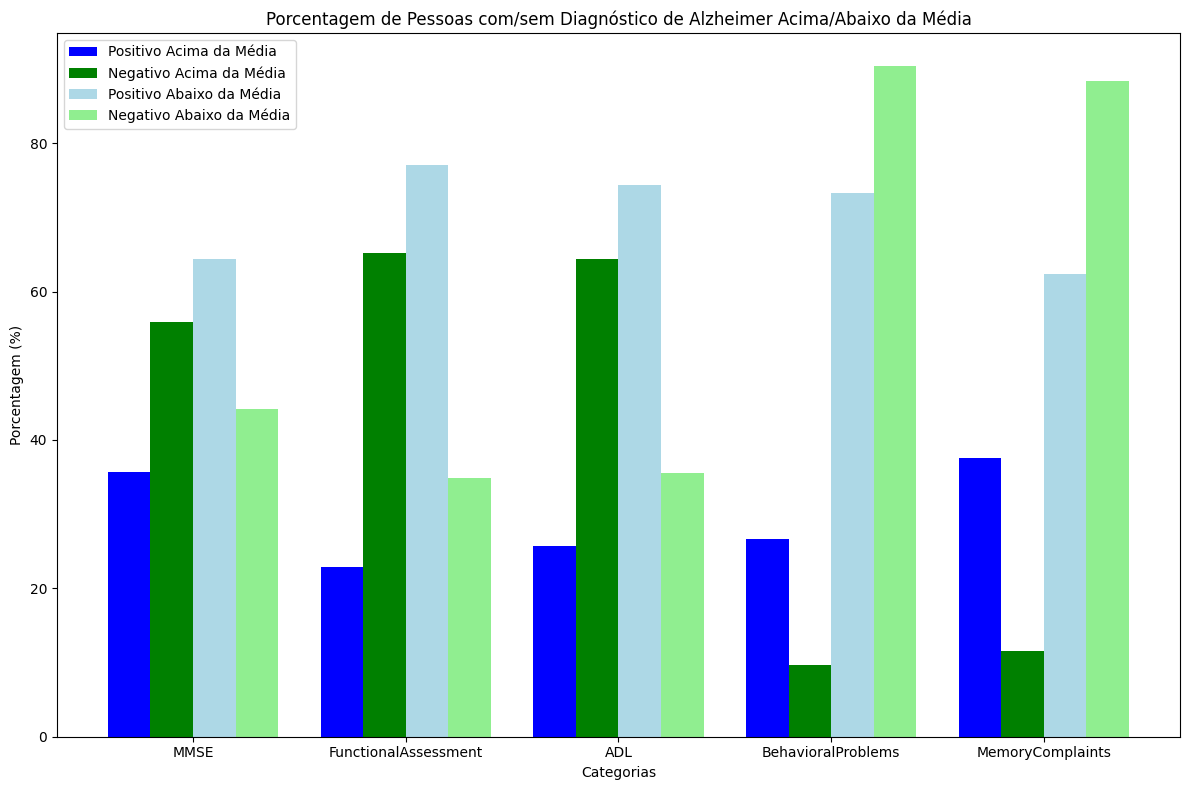

In [63]:
categories = ['MMSE', 'FunctionalAssessment', 'ADL', 'BehavioralProblems', 'MemoryComplaints']

# Diagnóstico Positivo
positive_above = [
    positive_diagnosis_MMSE_above_mean_percentage,
    positive_diagnosis_FunctionalAssessment_above_mean_percentage,
    positive_diagnosis_ADL_above_mean_percentage,
    positive_diagnosis_BehavioralProblems_above_mean_percentage,
    positive_diagnosis_MemoryComplaints_above_mean_percentage
]

positive_below = [
    positive_diagnosis_MMSE_below_mean_percentage,
    positive_diagnosis_FunctionalAssessment_below_mean_percentage,
    positive_diagnosis_ADL_below_mean_percentage,
    positive_diagnosis_BehavioralProblems_below_mean_percentage,
    positive_diagnosis_MemoryComplaints_below_mean_percentage
]

# Diagnóstico Negativo
negative_above = [
    negative_diagnosis_MMSE_above_mean_percentage,
    negative_diagnosis_FunctionalAssessment_above_mean_percentage,
    negative_diagnosis_ADL_above_mean_percentage,
    negative_diagnosis_BehavioralProblems_above_mean_percentage,
    negative_diagnosis_MemoryComplaints_above_mean_percentage
]

negative_below = [
    negative_diagnosis_MMSE_below_mean_percentage,
    negative_diagnosis_FunctionalAssessment_below_mean_percentage,
    negative_diagnosis_ADL_below_mean_percentage,
    negative_diagnosis_BehavioralProblems_below_mean_percentage,
    negative_diagnosis_MemoryComplaints_below_mean_percentage
]

# Posição eixo x
x = np.arange(len(categories))
width = 0.2

plt.figure(figsize=(12, 8))

plt.bar(x - width, positive_above, width, label='Positivo Acima da Média', color='blue')
plt.bar(x, negative_above, width, label='Negativo Acima da Média', color='green')

plt.bar(x + width, positive_below, width, label='Positivo Abaixo da Média', color='lightblue')
plt.bar(x + 2*width, negative_below, width, label='Negativo Abaixo da Média', color='lightgreen')

plt.xlabel('Categorias')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de Pessoas com/sem Diagnóstico de Alzheimer Acima/Abaixo da Média')
plt.xticks(x + width/2, categories)

plt.legend()
plt.tight_layout()
plt.show()

Como apresentado acima, foram usados alguns dados para avaliar o diagnóstico de Alzheimer: MMSE, Functional Assessment, ADL, Behavioral Problems e MemoryComplaints. Para cada métrica, foi calculada a porcentagem de pessoas com diagnóstico positivo e negativo de Alzheimer, comparando os escores acima e abaixo da média.

Em resumo, os indivíduos **sem diagnóstico** de Alzheimer tendem a ter uma maior porcentagem de escores **acima da média**, enquanto os indivíduos **com Alzheimer** apresentam uma maior distribuição de escores **abaixo da média**, especialmente no MMSE.

# 3.4 Treinamento

Para o treinamento do modelo de forma a identificar pacientes com ou sem o diagnóstico de Alzheimer, os previsores e as classes foram definidos, bem como os dados foram divididos entre treino (70%), e teste (30%).

In [44]:
# Separando previsores e classe
X = alzheimers_data[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
y = alzheimers_data['Diagnosis']

# Dividindo o dataset em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Assim, três modelos de Machine Learning foram utilizados para o treinamento:

- Logistic Regression
    - Técnica estatística que produz a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, a partir de variáveis explicativas contínuas e/ou binárias.

- Random Forest
    - Construção de múltiplas árvores de decisão de forma aleatória, e na forma de uma votação, a árvore final é escolhida, e usada.

- Decision Tree
    - Representação de fluxo do algoritmo através de árvores de decisão.

In [45]:
models = {
  "Logistic Regression": LogisticRegression(),
  "Random Forest": RandomForestClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
}

results = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results[model_name] = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
  }

for name, metrics in results.items():
  print(f"Model: {name}")
  print(f"Accuracy: {metrics['accuracy']:.2f}")
  print(f"Precision: {metrics['precision']:.2f}")
  print(f"Recall: {metrics['recall']:.2f}")
  print(f"F1: {metrics['f1']:.2f}")
  print("-" * 40)

Model: Logistic Regression
Accuracy: 0.83
Precision: 0.80
Recall: 0.72
F1: 0.76
----------------------------------------
Model: Random Forest
Accuracy: 0.95
Precision: 0.97
Recall: 0.90
F1: 0.93
----------------------------------------
Model: Decision Tree
Accuracy: 0.90
Precision: 0.85
Recall: 0.86
F1: 0.85
----------------------------------------


## 4. Análise dos Resultados

Com o treinamento do modelo de Machine Learning, e a validação dos dados, observou-se que a Random Forest se destaca como o modelo mais eficaz, apresentando a maior acurácia, precisão, recall e F1. Isso sugere que ele captura melhor as complexidades dos dados e as relações entre as variáveis preditivas.

Por outro lado, a Logistic Regression mostrou ser a menos eficaz dos três, especialmente em termos de recall, o que é crítico em diagnósticos médicos, em que é importante identificar o maior número possível de casos positivos.

A Decision Tree fornece um bom compromisso, mas ainda não atinge a mesma eficácia que o Random Forest.

Dessa forma, destacam-se alguns pontos de possíveis melhorias do modelo:
- Aprimoramento: Experimento com mais técnicas de ensemble e/ou ajuste de hiperparâmetros nos modelos existentes para melhorar ainda mais o desempenho.
- Análise de Dados: Talvez outras variáveis também possam apresentar uma relevância ao diagnóstico do Alzheimer.

Mesmo assim, os presentes resultados destacam a importância de escolher o modelo certo em aplicações de diagnóstico médico. O modelo Random Forest se mostra como uma escolha robusta para identificar a presença de Alzheimer com alta precisão e confiabilidade.